<a href="https://colab.research.google.com/github/Labs123355/hey_world/blob/main/Lesson_11_DAAN_862_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Set Information
The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa, and Canadian, 70 elements each, randomly selected for
the experiment. High-quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combined harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

Attribute Information
To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.

Please use this data to finish the following tasks.

1. Explore the data set. (10 points)
2. Use K-means clustering to group the seed data. (30 points)
3. Use different linkage type for Hierarchical clustering to the seed data
4. which linkage type give the best result? (30 points)
5. Use DBscan clustering group the seed data and find the best epses and min_samples value. (30 points)

In [ ]:
!#\usr\bin\env python
'''This the lesson 11 homework for DAAN 862 packages needed commented below'''

# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn
# !pip install google-colab


'This the lesson 11 homework for DAAN 862 packages needed commented below'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/seeds_dataset.txt'
columns = [ f'Attributes_{i + 1}' for i in range(8) ]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(file_path, delim_whitespace=True, names= columns )
df.tail()


,Attributes_1,Attributes_2,Attributes_3,Attributes_4,Attributes_5,Attributes_6,Attributes_7,Attributes_8
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [ ]:

# we are doing this so are test matches our predictions for better accuracy are cluster use 0-100
data = df.replace([1, 2, 3], [0, 1, 2])

data.tail()

,Attributes_1,Attributes_2,Attributes_3,Attributes_4,Attributes_5,Attributes_6,Attributes_7,Attributes_8
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,2


## EDA

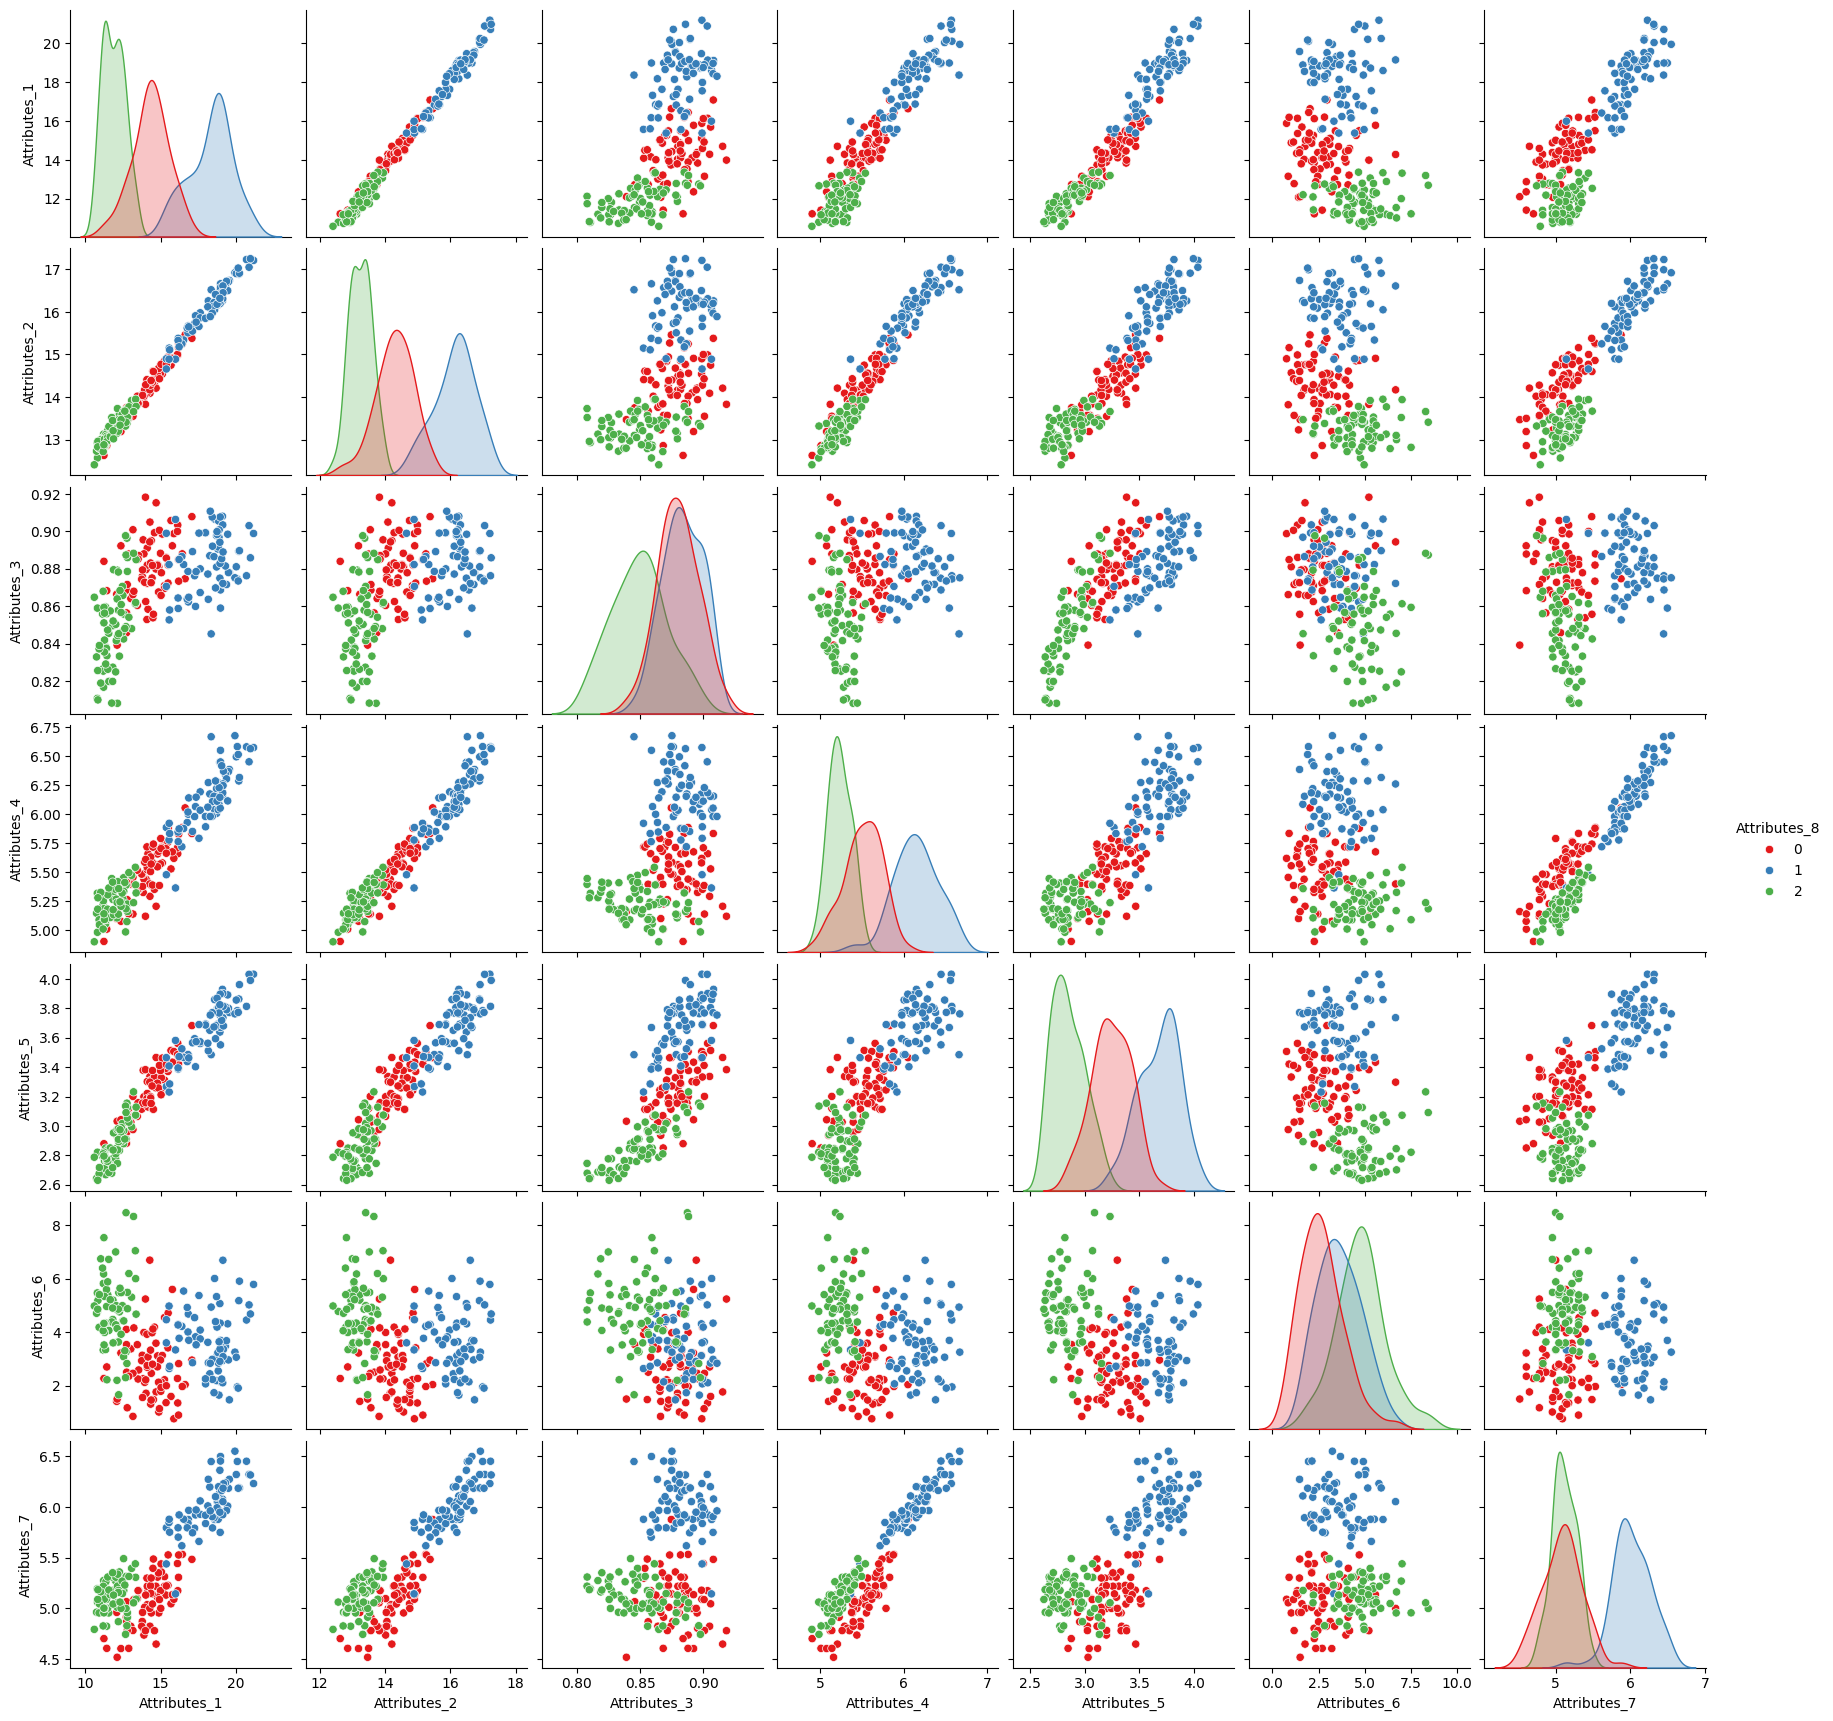

In [ ]:
# Pairplot using sns
sns.pairplot(data, hue='Attributes_8', palette= 'Set1')
plt.show()


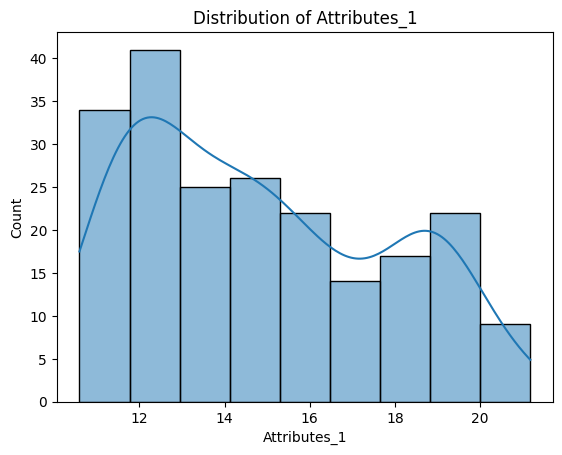

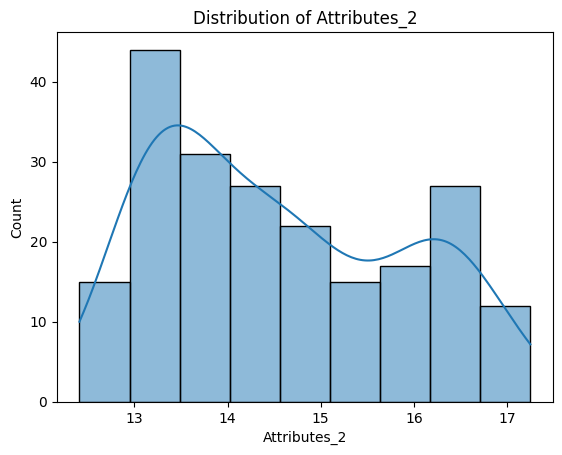

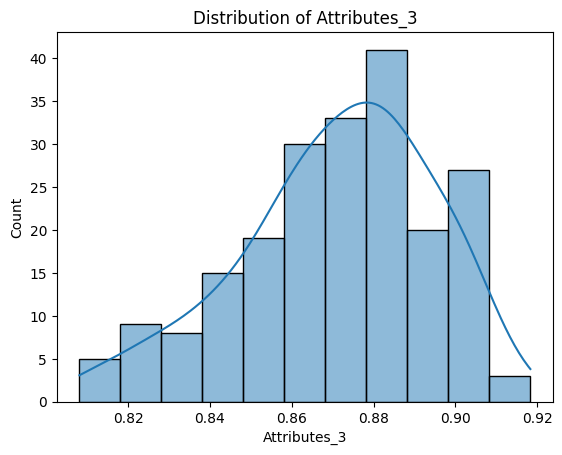

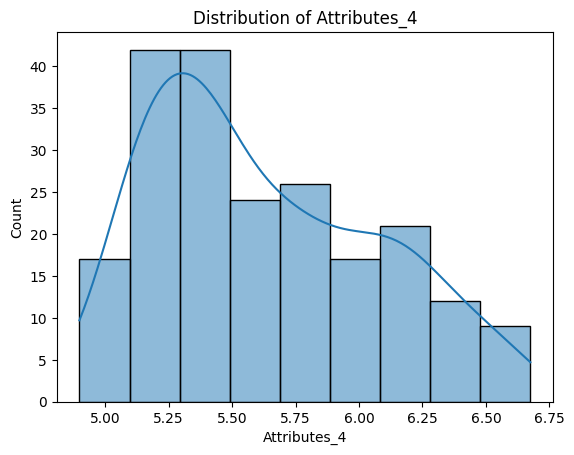

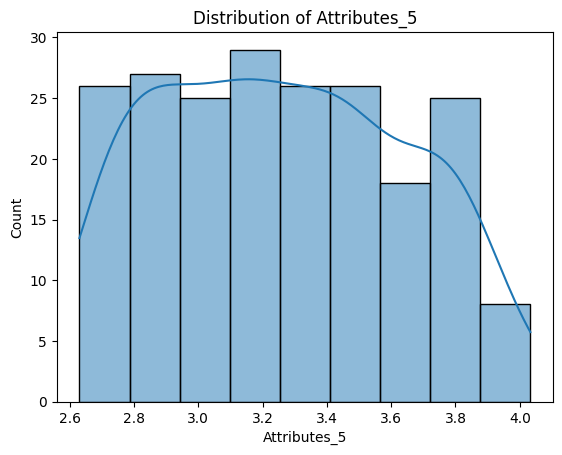

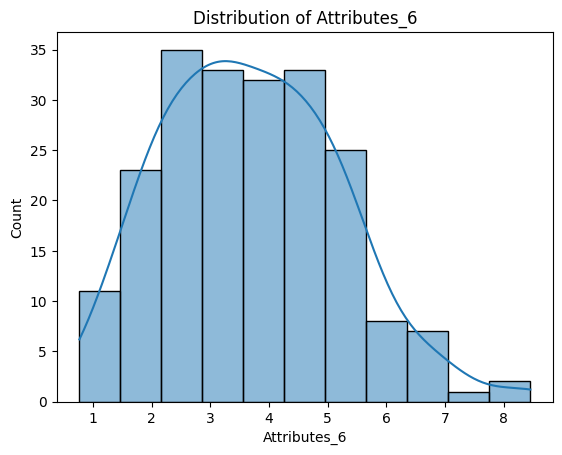

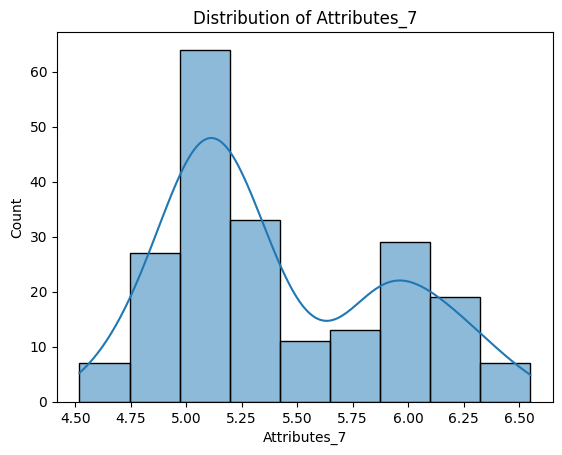

In [ ]:
# Distribution plots for each attribute
for col in data.columns[:-1]:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


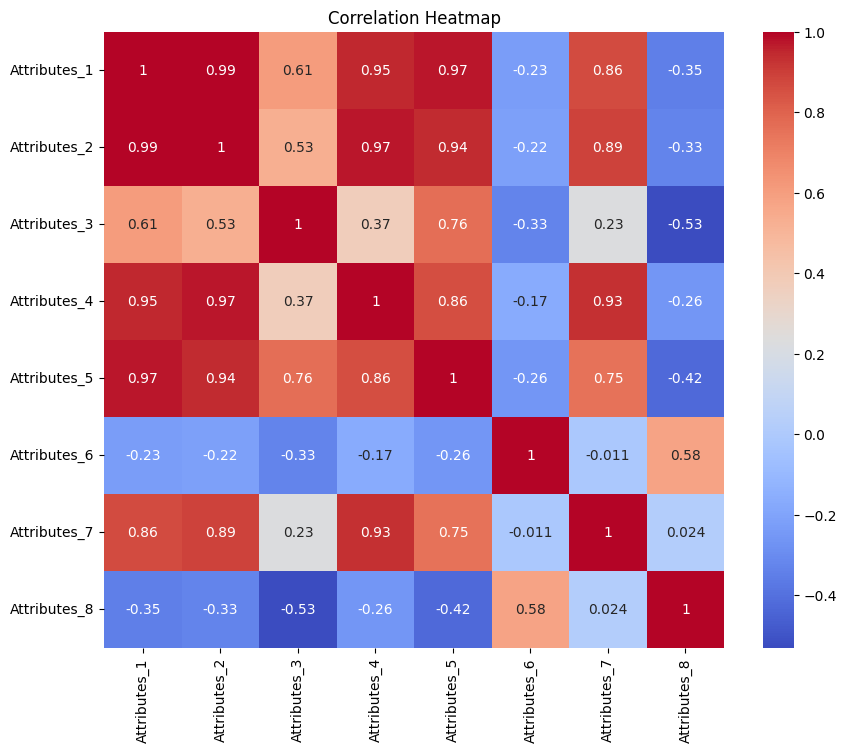

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Clustering Algorithms

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Rescale variables--> ensures that each variable contributes equally to the distance calculations used by clustering algorithms
scaler = MinMaxScaler()

X = data.drop(columns=['Attributes_8'], axis=1)
y = data['Attributes_8']
X = scaler.fit_transform(X)


## Choosing the right K

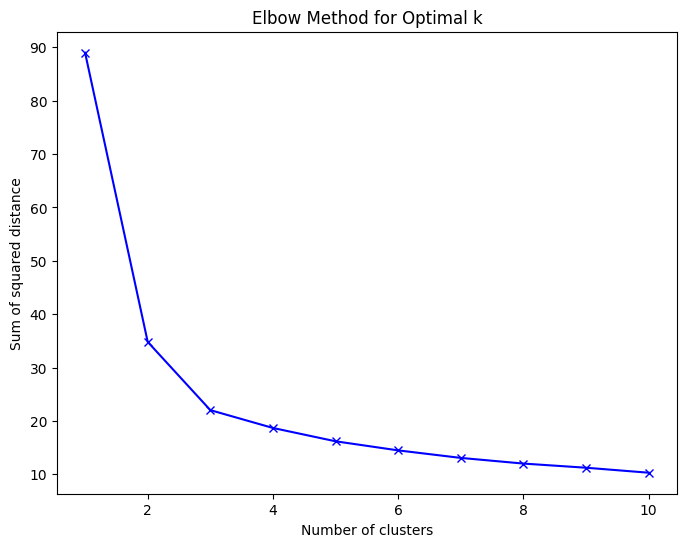

In [ ]:
#Plot the sum of squared distances from each point to its assigned cluster center (inertia) as a function of 𝑘
from sklearn.cluster import KMeans
inertia = []
kmax = 11
K = range(1, kmax)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
result = []
from sklearn import metrics
nclusters = range(2, 11)
for n in nclusters:
  y_pred_temp = KMeans(n_clusters= n).fit_predict(X)
  score = metrics.silhouette_score(X, y_pred_temp, metric = 'euclidean')
  result.append((n, score))
result

[(2, 0.505113885588951),
 (3, 0.4221052568124793),
 (4, 0.33833436525733235),
 (5, 0.302367233390823),
 (6, 0.3006640981528562),
 (7, 0.25994520929821197),
 (8, 0.2652866697735368),
 (9, 0.26831801661399307),
 (10, 0.25095447454962094)]

Highest silhouette score indicates the K we should use. However using the elbow method we can see the number of clusters versus the sum of squared distances do not have as much change after 3 clusters. I would use 3 instead of 2

In [ ]:
data.describe()

,Attributes_1,Attributes_2,Attributes_3,Attributes_4,Attributes_5,Attributes_6,Attributes_7,Attributes_8
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [ ]:
def graph( name, model_var):
  ''' Graphs Scatter plot of our Original Data and Clustered data
    Inputs: name, model_var
    Outputs: Scatter plot of Original Data and Clustered Data
  '''
  fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
  # Plot the original data
  ax1.set_title('Original Data')
  scatter = ax1.scatter(data.iloc[:, 0], data.iloc[:, 1], c= y, cmap='viridis')

  ax1.set_xlabel('X')
  ax1.set_ylabel('Y')

  # Plot the k-means clustered data
  ax2.set_title(name)
  scatter = ax2.scatter(data.iloc[:, 0], data.iloc[:, 1], c= model_var.labels_, cmap='rainbow')

  ax2.set_xlabel('X')
  ax2.set_ylabel('Y')

  plt.tight_layout()

  plt.show()



In [ ]:
#confusion Matrix
from sklearn import metrics
from sklearn.metrics import classification_report

def evaluation(test, pred, name):
  ''' Provides evaluation metrics for a model. Outputs precision, accuracy, recall, and confusion matrix.

      Inputs: test, pred, name
      Outputs: Confusion Matrix, Classification Report, Name of model, and evaluation metrics
  '''
  print(f'Evaluation for {name}\n')
  print(f"Homogeneity Score: {metrics.homogeneity_score(y, pred)}")

  print(f"Completeness Score: {metrics.completeness_score(y, pred)}")

  print(f"Adjusted Rand Score: {metrics.adjusted_rand_score(y, pred)}")

  print(f"Silhouette Score: {metrics.silhouette_score(X, pred)}")


  print(classification_report(test, pred))

  cm = metrics.confusion_matrix(test, pred)
  cm_display = metrics.ConfusionMatrixDisplay(cm)

  cm_display.plot()
  plt.show()

In [ ]:
K = 3
k = K

Evaluation for K-Means

Homogeneity Score: 0.6734021033886654
Completeness Score: 0.6751899081752645
Adjusted Rand Score: 0.7048605249026285
Silhouette Score: 0.4221052568124793
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        70
           1       0.97      0.89      0.93        70
           2       0.87      0.96      0.91        70

    accuracy                           0.89       210
   macro avg       0.89      0.89      0.89       210
weighted avg       0.89      0.89      0.89       210



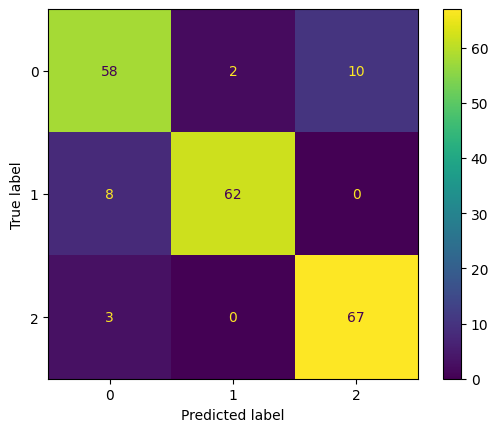

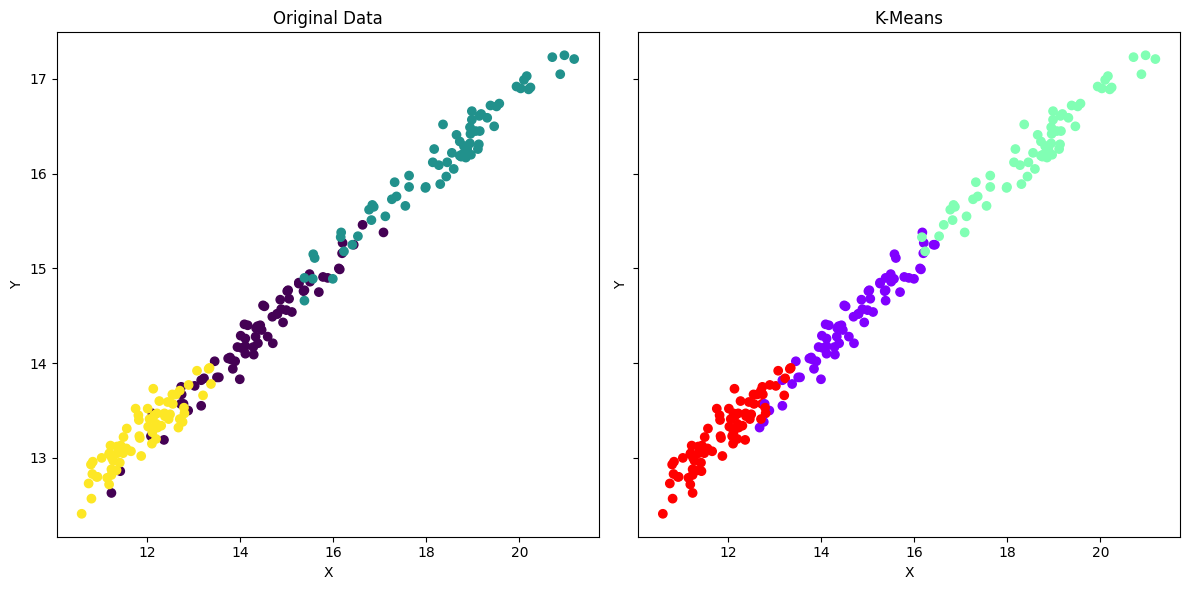

In [ ]:

kmeans = KMeans(n_clusters=k)
k_predict = kmeans.fit_predict(X)

evaluation(y, k_predict, 'K-Means')
print('\n')
graph('K-Means', kmeans)


## DBSCAN

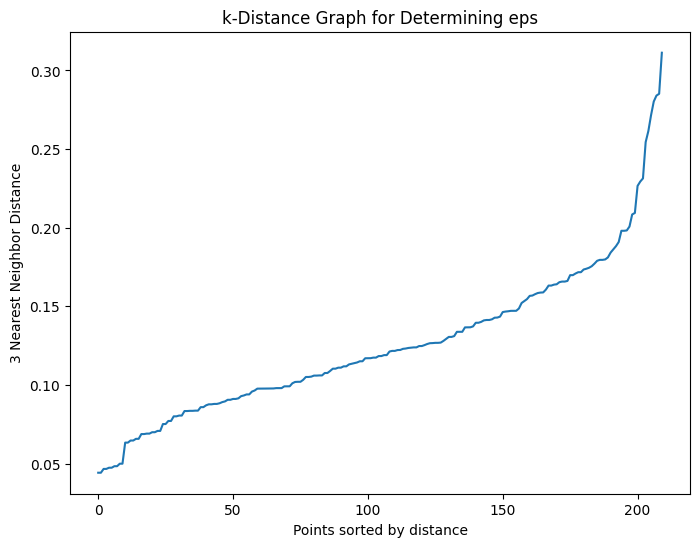

'Link: to code help: https://www.kaggle.com/code/tanmaymane18/nearestneighbors-to-find-optimal-eps-in-dbscan'

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Compute the k-nearest neighbors
 # Typically, k is chosen as the dimensionality of the data
nbrs = NearestNeighbors(n_neighbors= k).fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort the distances to the k-th nearest neighbor
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plot the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k} Nearest Neighbor Distance')
plt.title('k-Distance Graph for Determining eps')
plt.show()

'''Link: to code help: https://www.kaggle.com/code/tanmaymane18/nearestneighbors-to-find-optimal-eps-in-dbscan'''

In [ ]:
from sklearn.cluster import DBSCAN
# manually grid search for eps and min_samples
result = []
epses = [ 0.26, 0.261, 0.262, 0.263,  0.264]
min_samples = [ 15, 20]
for v in epses:
    for n in min_samples:
        model = DBSCAN(eps = v, min_samples = n)
        y_pred_temp = model.fit_predict(X)
        # find the number of clusters
        n_clusters = np.unique(model.labels_).size
        if n_clusters > 1:
            score = metrics.silhouette_score(X, y_pred_temp, metric = 'euclidean')
        else:
            score = 0
        result.append((v, n, score, n_clusters))
result

[(0.26, 15, 0.3402192442358912, 3),
 (0.26, 20, 0.2199623904037486, 3),
 (0.261, 15, 0.3490234631948499, 3),
 (0.261, 20, 0.22363185527629026, 3),
 (0.262, 15, 0.34825663908068594, 3),
 (0.262, 20, 0.23335166554710798, 3),
 (0.263, 15, 0.34825663908068594, 3),
 (0.263, 20, 0.24046432602869328, 3),
 (0.264, 15, 0.34825663908068594, 3),
 (0.264, 20, 0.2500101431103615, 3)]

In [ ]:
from sklearn.cluster import DBSCAN

#min_sample is usually length of attributes plus 1 so 7 Att + 1
DBSCAN_model  = DBSCAN(eps= 0.264, min_samples= 15 , metric='euclidean' )
db_predict  = DBSCAN_model.fit_predict(X)



Evaluation for DBSCAN

Homogeneity Score: 0.4396717050410324
Completeness Score: 0.5341443682545105
Adjusted Rand Score: 0.4297803728723861
Silhouette Score: 0.34825663908068594
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.46      0.84      0.60        70
           1       0.97      0.83      0.89        70
           2       0.00      0.00      0.00        70

    accuracy                           0.56       210
   macro avg       0.36      0.42      0.37       210
weighted avg       0.48      0.56      0.50       210



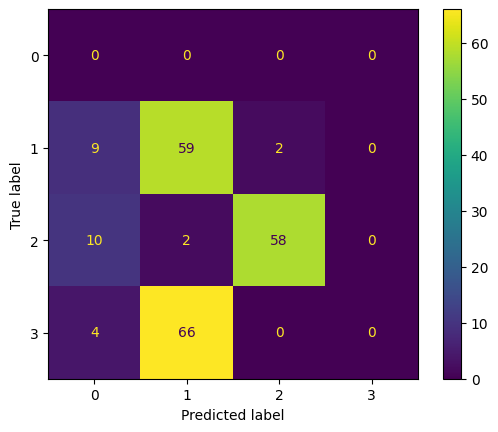

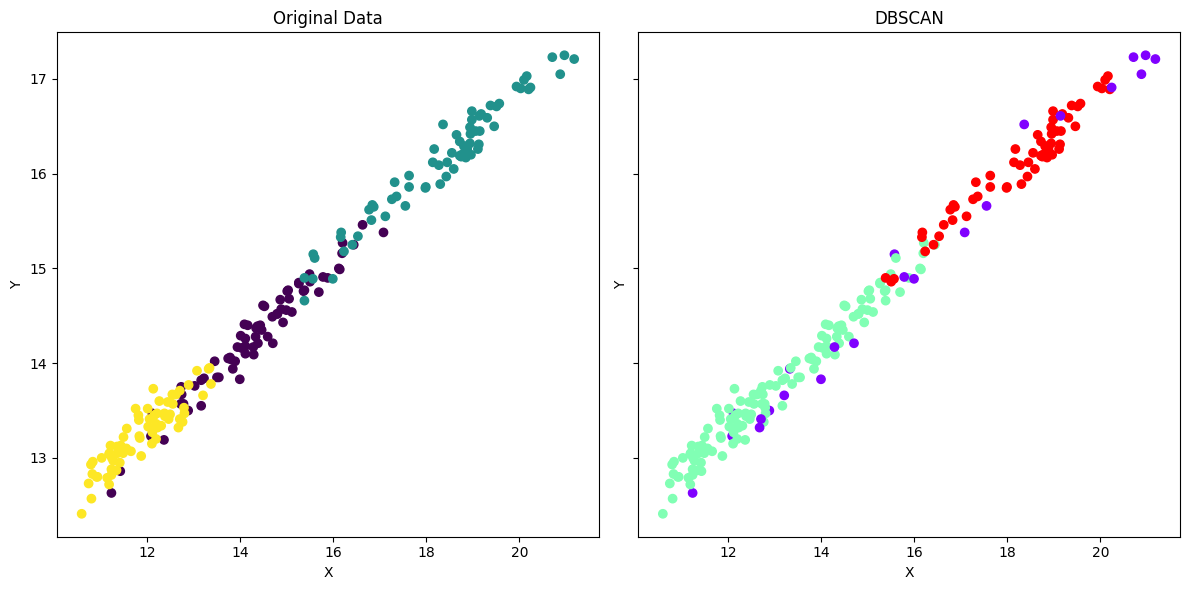

In [ ]:
evaluation(y, db_predict, 'DBSCAN')
print('\n')
graph('DBSCAN', DBSCAN_model)

## Agglomerative Clustering

Evaluation for Agglomerative Clustering (average)

Homogeneity Score: 0.7016719692947548
Completeness Score: 0.7098244492986717
Adjusted Rand Score: 0.7247242716839253
Silhouette Score: 0.39437476201792854
              precision    recall  f1-score   support

           0       0.93      0.74      0.83        70
           1       0.96      0.97      0.96        70
           2       0.82      0.97      0.89        70

    accuracy                           0.90       210
   macro avg       0.90      0.90      0.89       210
weighted avg       0.90      0.90      0.89       210



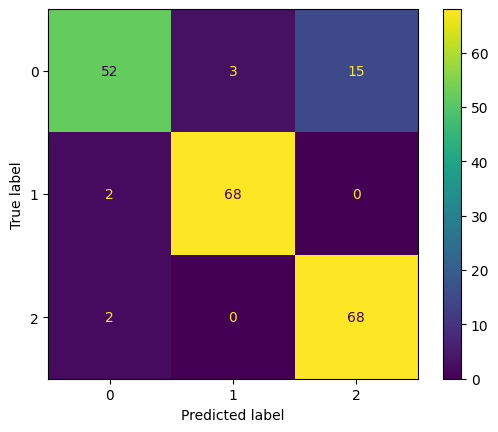

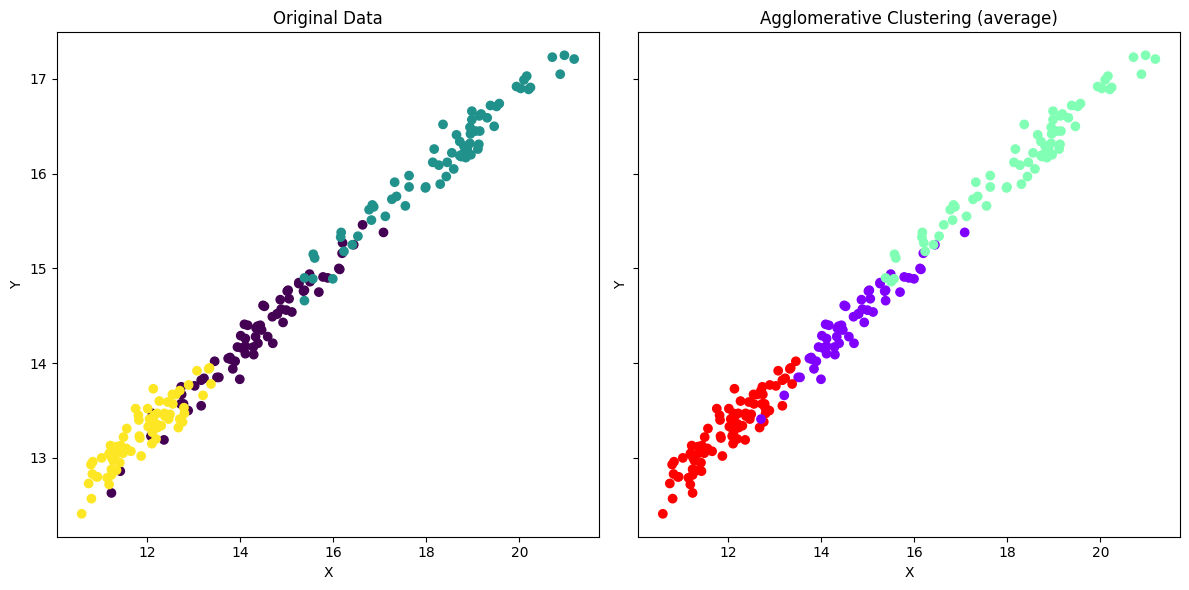

In [ ]:
from math import e
from sklearn.cluster import AgglomerativeClustering
agg_avg_model = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage= 'average')

# Fit the model to your data
agg_avg_predict= agg_avg_model.fit_predict(X)

evaluation(y, agg_avg_predict, 'Agglomerative Clustering (average)')
print('\n')
graph('Agglomerative Clustering (average)', agg_avg_model)

Evaluation for Agglomerative Clustering (complete)

Homogeneity Score: 0.6088174496902253
Completeness Score: 0.6356867819968337
Adjusted Rand Score: 0.5663819104900444
Silhouette Score: 0.3637982100400148
              precision    recall  f1-score   support

           0       0.68      0.99      0.81        70
           1       1.00      0.77      0.87        70
           2       0.98      0.77      0.86        70

    accuracy                           0.84       210
   macro avg       0.89      0.84      0.85       210
weighted avg       0.89      0.84      0.85       210



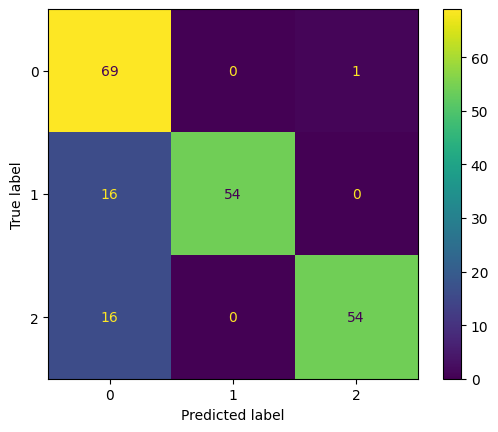

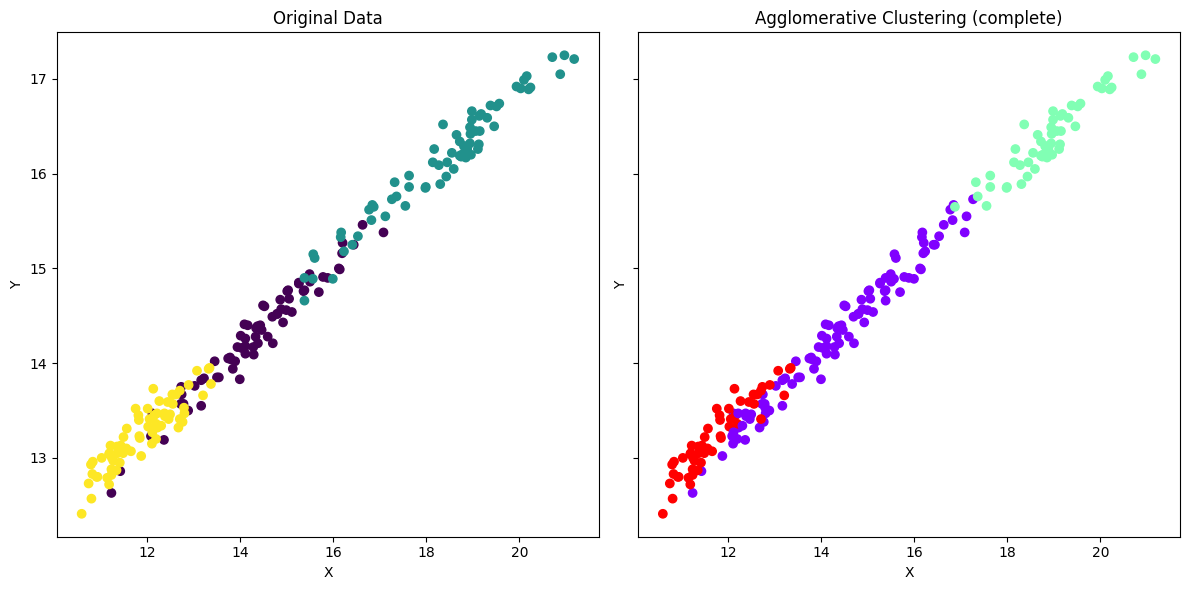

In [ ]:
agg_com_model = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage= 'complete')

# Fit the model to your data
agg_com_predict= agg_com_model.fit_predict(X)

evaluation(y, agg_com_predict, 'Agglomerative Clustering (complete)')
print('\n')
graph('Agglomerative Clustering (complete)', agg_com_model)


Evaluation for Agglomerative Clustering (ward)

Homogeneity Score: 0.6825990188762133
Completeness Score: 0.6975309670281452
Adjusted Rand Score: 0.6752090091502835
Silhouette Score: 0.38103690313150723
              precision    recall  f1-score   support

           0       0.22      0.29      0.25        70
           1       0.97      0.93      0.95        70
           2       0.00      0.00      0.00        70

    accuracy                           0.40       210
   macro avg       0.40      0.40      0.40       210
weighted avg       0.40      0.40      0.40       210



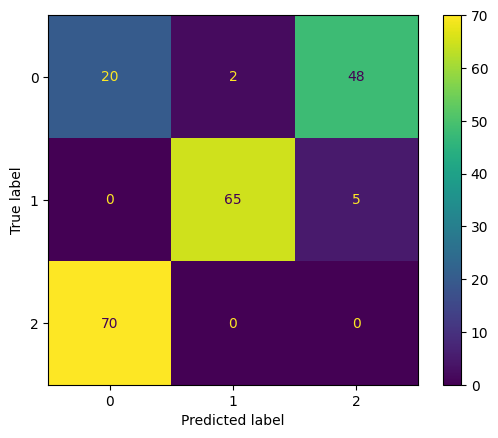

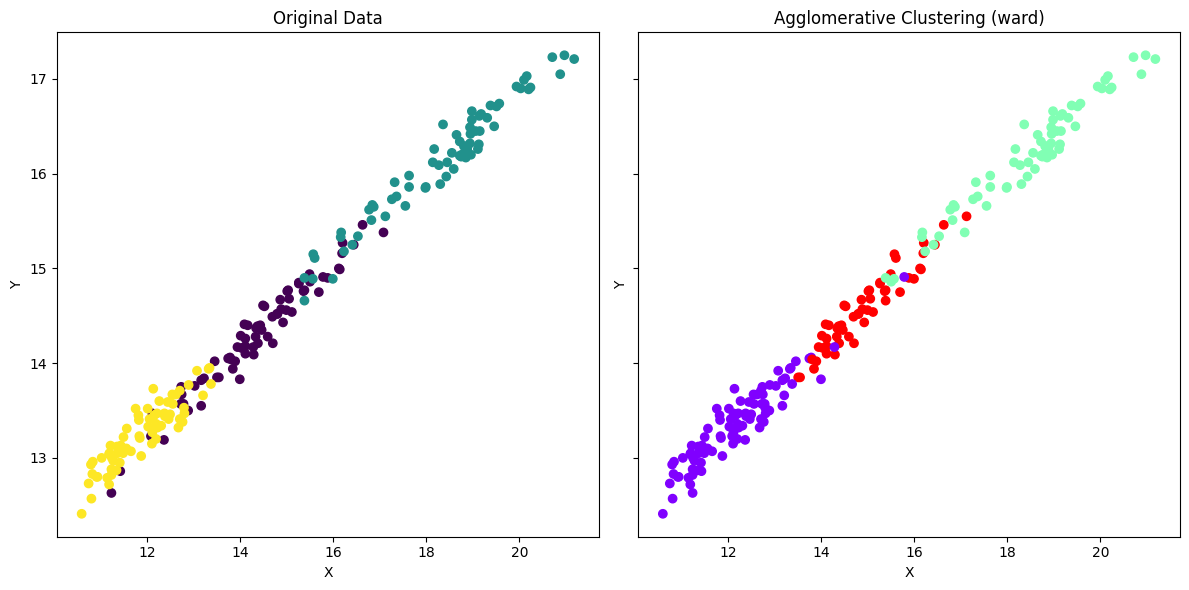

In [ ]:

agg_ward_model = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage= 'ward')

# Fit the model to your data
predict= agg_ward_model.fit_predict(X)

evaluation(y, predict, 'Agglomerative Clustering (ward)')
print('\n')
graph('Agglomerative Clustering (ward)', agg_ward_model)

**Summary of Clustering Algorithm Performance:**

- **K-Means**: This algorithm demonstrated significant improvement in classification metrics such as precision, recall, and f1-score, achieving high accuracy. These results indicate strong clustering performance for this dataset.
  
- **Agglomerative Clustering (Average Linkage)**: This method also performed well, exhibiting high scores in homogeneity, completeness, adjusted rand index, and accuracy. It seems particularly adept at identifying outliers and noise within the data.

- **DBSCAN**: This algorithm showed moderate performance. While it had strong clusters in some instances, its performance was weak in others, especially in identifying noise.

- **Agglomerative Clustering (Complete Linkage)**: This method performed well but was slightly less effective compared to average linkage.

- **Agglomerative Clustering (Ward Linkage)**: Although this algorithm displayed high precision and recall for one cluster, its performance for the other clusters was poor, resulting in low overall accuracy.

**Conclusion**: Based on these evaluations, both K-Means and Agglomerative Clustering with average linkage are recommended for this dataset. K-Means has a slight edge due to its superior classification metrics and overall accuracy.